In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
sns.set(color_codes=True)

In [4]:
df=pd.read_csv("D:/AppliedAI/Assignments/haberman.csv")

# Haberman Data Set Analysis

source data: "https://www.kaggle.com/gilsousa/habermans-survival-data-set"

**Attributes** : 

The *haberman* dataset has 4 attributes namely : 

1.*age* : Age of patient at time of operation; numerical variable [dtype int64, 30<=age<=83 ]

2.*year* : Patient's year of operation in 1900s; numerical [dtype int64]

3.*nodes* : Number of positive axillary nodes detected; numerical variable [dtype int64]

4.*status* : Survival Status; Categorical variable taking values 1 or 2 [dtype int64]
> * 1 signifies patient survived 5 years or longer
> * 2 signifies patient died within 5 years





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.columns # column names of dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
print(df.head(),'\n')      # first few rows of data set
print("Minimum age of patient ",np.min(df.age)) # 30 years
print("Maximum age of patient ",np.max(df.age)) # 83 years 
print("patient with status 1  ",df[df.status==1]['status'].count())
print("patient with status 2  ",df[df.status==2]['status'].count())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1 

Minimum age of patient  30
Maximum age of patient  83
patient with status 1   225
patient with status 2   81


## Data Description

* The dataset has 306 rows and 4 columns. 
* There are no missing or null values.
* Node here represent Lymph Nodes 
  > Lymph nodes reference
* *status* is the class attribute and the data set is imbalanced as the no. of instances for **class 1**  is 225 and for **class 2** is 81 


## Objective

Our objective is to analyse the data and draw conclusions whether the variables such as *age*, *nodes* and *year* affect the chances of survival of patient after the operation or medical procedure. In the process we will try to bring out the insights from the data which might support our case.

## Univariate Analysis

**Year wise distribtuion of patients**

We have plotted the histogram density for the patients in each year and categorised under *status* . The plot doesn't give much information and overlaps. However we notice that there was a spike in patients who died within 5 years of surgery in years 1965-66 compared to the patients who survived more than 5 years.

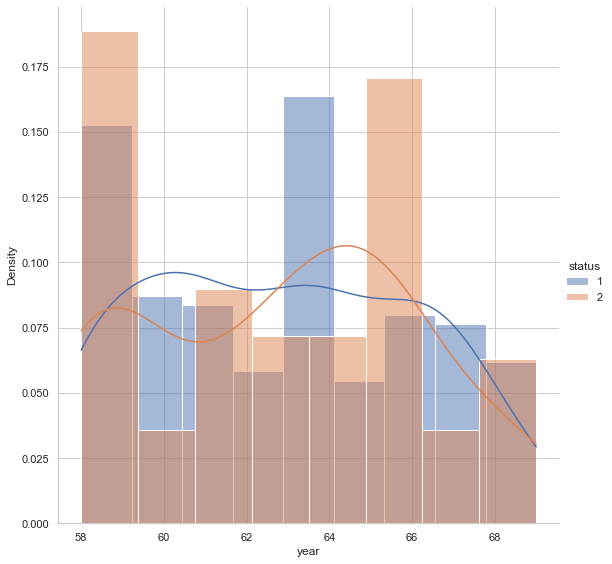

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='status',height=8)\
    .map(sns.histplot,'year',kde=True,stat='density',palette='crest').add_legend();
plt.show()

The below histogram plots the densiities of variable patient's *age* classified against attribute *status*. Both the classes follow similar distribution with middle-aged people being the dominant age group in the data set

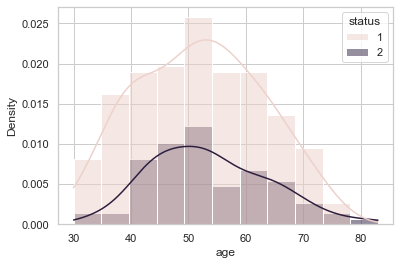

In [9]:
sns.histplot(data=df,x='age',hue='status',kde=True,stat='density');

**Nodes Distribution**

The plot below shows us that the data is right skewed where **85.94 % of people have nodes** less than 10 patients with status 1 being **78.32 %**  of total patients 

status
1    17
2    23
Name: status, dtype: int64

<Figure size 2880x720 with 0 Axes>

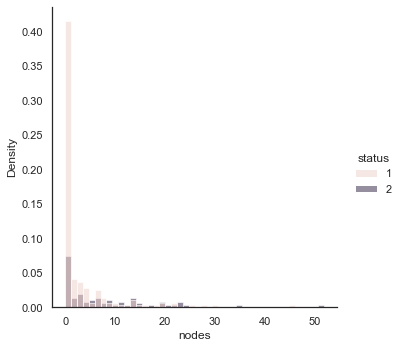

In [110]:
fig=plt.gcf();
fig.set_size_inches(40,10);
sns.set_style('white');
sns.displot(data=df,x="nodes",hue="status",stat='density');

df[df['nodes']<5].groupby('status')['status'].count()
df[df['nodes']>10].groupby('status')['status'].count()

**Cummulative density function** 

we have potted KDE plot( CDF ) of number of nodes for people with status 2. Also there is PDF which shows the distribution of nodes. It is clear from the plot that patients with nodes more than 10 had a probability  **0.57** of dying within 5 years of surgery. 

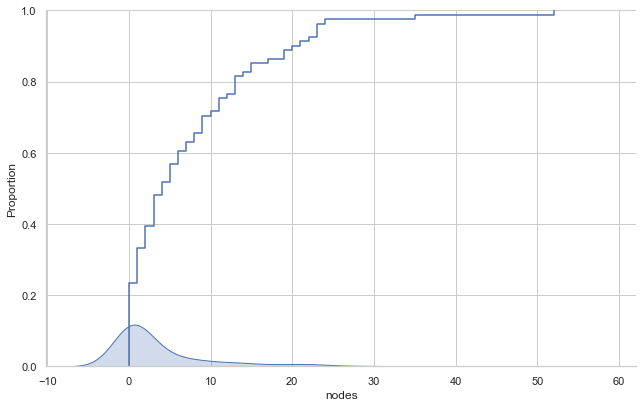

In [99]:
sns.set_style('whitegrid')
sns.displot(data=df[df['status']==2],x='nodes',kind='ecdf')
sns.kdeplot(data=df,x='nodes',fill=True)
fig=plt.gcf()
fig.set_size_inches(10,6)

<AxesSubplot:xlabel='nodes', ylabel='Density'>

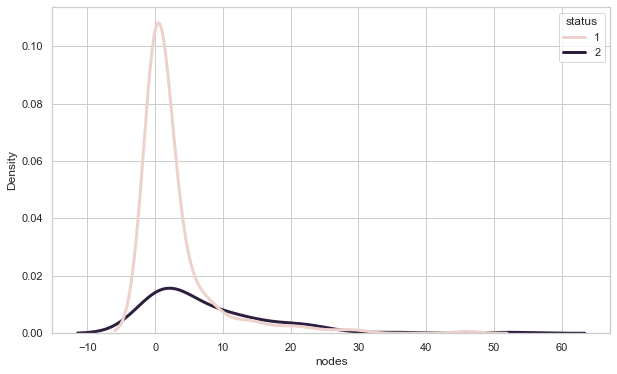

In [12]:
fig=plt.gcf()
fig.set_size_inches(10,6)
sns.set_style('whitegrid')
sns.kdeplot(data=df,x='nodes',hue='status',lw=3)

### PDF and CDF

[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


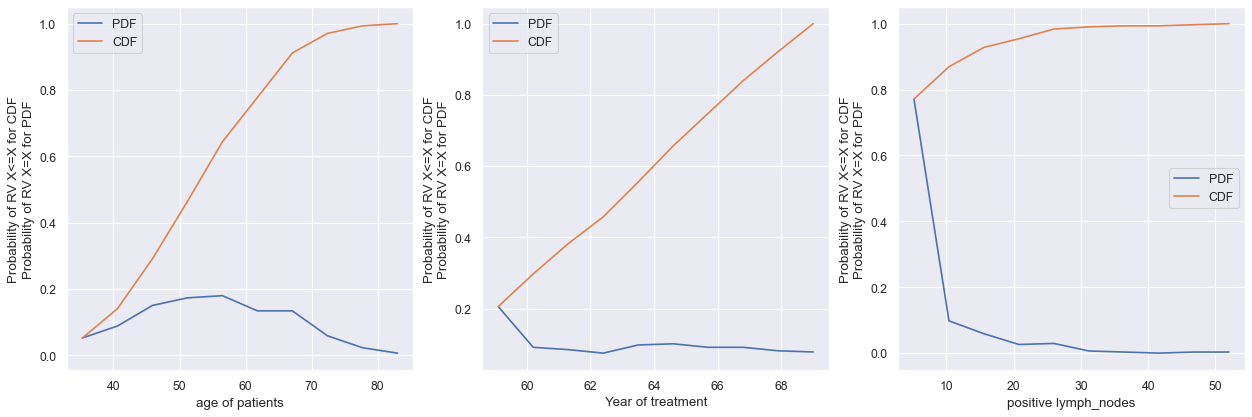

In [76]:
sns.set(color_codes=True) # sns style color
plt.figure(figsize=(19,6), dpi=80) # set figure size using pyplot

counts, bin_edges = np.histogram(df['age'], bins=10, # points and bin edges of histogram
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.subplot(1,3,1)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('age of patients')
plt.ylabel('Probability of RV X<=X for CDF\nProbability of RV X=X for PDF')

plt.legend()

counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.subplot(1,3,2)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('Year of treatment')
plt.ylabel('Probability of RV X<=X for CDF\nProbability of RV X=X for PDF')

plt.legend()


counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.subplot(1,3,3)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('positive lymph_nodes')
plt.ylabel('Probability of RV X<=X for CDF\nProbability of RV X=X for PDF')
plt.legend() # probabilty of finding nodes <=10.4 is 0.86928105 




## Bi-Variate Analysis



The following scatterplot shows that the patients in the Age-group of 45-70 yrs have more patients with status 2.   

<AxesSubplot:xlabel='age', ylabel='nodes'>

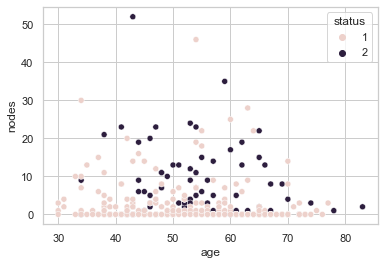

In [14]:
sns.scatterplot(data=df,x='age',y='nodes',hue='status')

#### pairplot
In the pairplot,we see that the number of nodes can be significant contributor to classification of patients as *status 1 or 2*
Also, the patients who are older (Age>50) tend to have inclination towards *status 1*

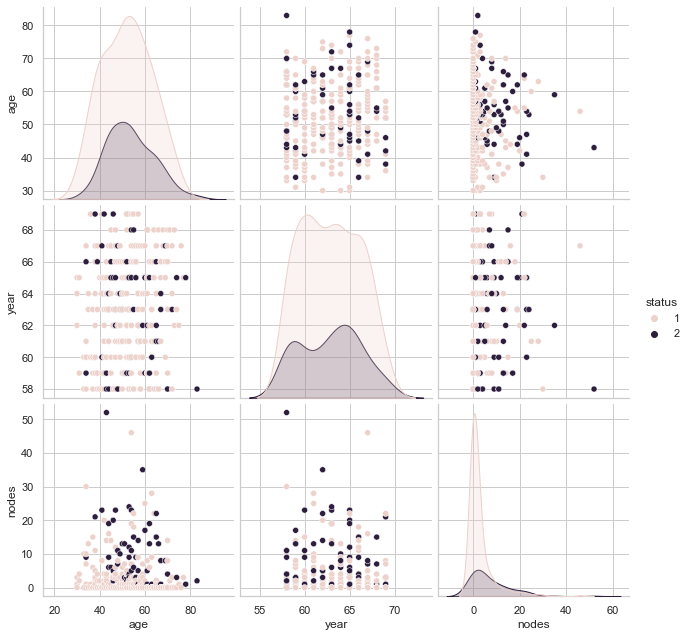

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='status',height=3)
plt.show();

## Median, Mean, Quantile, IQR


We can find the measures of location for this data set. For eg: 

Median Age of patients and quantiles.  
* Q1=43,Q3=60 for status 1. Hence IQR=17 
* Q1=46,Q3=61 for status 2. Hence IQR=15 


In [16]:
# Reference : Exploratory_Data_Analysis.ipynb, author:'Applied Ai'

#Median of age of patients for status 1 and status 2
print('median age of patients with status 1: ',int(np.median(df.loc[df['status']==2,'age'])))
print("median age of patients with status 2: ",int(np.median(df.loc[df['status']==1,'age'])),"\n\n")

#Mean of age of patients for status 1 and status 2
print(df.groupby('status')['age'].mean(),"\n\n")

#Quantiles and IQR
print(np.percentile(df.loc[df['status']==1,"age"],np.arange(0, 100, 25)))
print(np.percentile(df.loc[df['status']==2,"age"],np.arange(0, 100, 25)))



median age of patients with status 1:  53
median age of patients with status 2:  52 


status
1    52.017778
2    53.679012
Name: age, dtype: float64 


[30. 43. 52. 60.]
[34. 46. 53. 61.]


## Boxplot




[Text(0.5, 0, 'Age of Patients')]

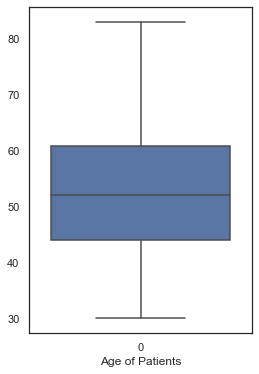

In [120]:
fig=plt.figure(figsize=(4,6))
sns.boxplot(data=df['age']).set(xlabel="Age of Patients")


array([0., 0., 3.])

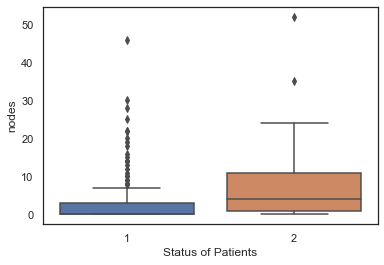

In [135]:
sns.boxplot(data=df,x='status',y='nodes').set(xlabel="Status of Patients")
np.percentile(df.loc[df['status']==1,'nodes'],[25,50,75])

## Violin plot

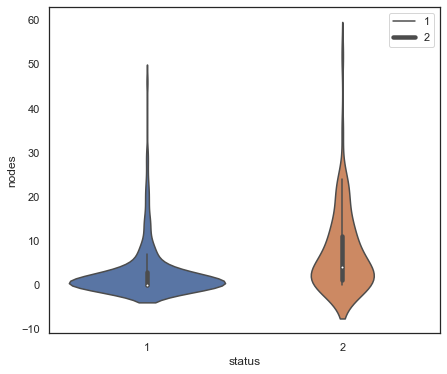

In [144]:
fig=plt.figure(figsize=(7,6))
sns.violinplot(x='status', y='nodes',data=df)
plt.legend(['1','2'])
plt.show()

## Conclusions

### From PDFs and CDFs
1. patients with nodes more than 10 had a probability **0.57** of dying within 5 years of surgery.
2. probabilty of finding nodes <=10 is **0.85948105**; i.e. **85.94%** of patients have nodes less than or equal to 10
3. The histogram plot for nodes shows us that the data is right skewed where 85.94 % of people have nodes less than 10 patients with status 1 being **78.32 %** of total patients
4. If a patient's lymph nodes lies in [0,5], his probabilty of survival is **0.871**



### From pairplots and Scatter Plots
1. In the pairplot,we see that the number of nodes can be significant contributor to classification of patients as *status 1 or 2* 
2. Patients who died within 5 years of treatment prominently belong to agegroup of 50-70 years. 

### From boxplot
1. **Outliers** are present when boxplot is plotted for lymph nodes for each status.Median is 0 and Q1=0,Q3=3. IQR=3 
2. No outliers in the age of patients.



## Observations

We have made few observations from the exploratory data analysis.
1. The patients who are older (Age>50) tend to have inclination towards *status 1*
2. The data set is imbalanced and the attributes do not provide a great classification basis for class attributes.
3. The probabilty of survival is 0.871 when patient's lymph nodes lies in [0,5].
4. The violin plot shows that people with status 1 have a concentrated density in region of nodes=0